<a href="https://colab.research.google.com/github/Praveenyeduresi/CE880_CaseStudy/blob/main/Predictive_Modelling_for_Early_Detection_of_Postpartum_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install category-encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
import xgboost as xgb
#!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
pwd

'/content/drive/My Drive'

# **1.Data Loading**

In [6]:
#Data Loading
df=pd.read_excel("data_PostNatal.xlsx")
print("Shape of the data:",df.shape)
print("Features in data:",df.columns)
df.head() # top rows of the data

Shape of the data: (1503, 10)
Features in data: Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious'],
      dtype='object')


,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


#**2.Exploring the Dataset**

In [7]:
#description of the data
df.describe(include='all')

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [8]:
#checking missing values
df.isnull().sum()


Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [9]:
# checking outliers
category_counts = df.apply(pd.Series.value_counts)

# setting outlier threshold as 15; categories with frequencies less than 15
threshold = 15

outliers = category_counts[category_counts < threshold].stack().index.tolist()

print("Outlier categories:")
for outlier in outliers:
    print(outlier[0], outlier[1])

Outlier categories:


# **3.Performing data preprocessing and cleaning**

In [ ]:
# Replace missing values with mode imputation
mode=df['Irritable towards baby & partner'].mode()[0]
df['Irritable towards baby & partner'].fillna(mode, inplace=True)


mode=df['Problems concentrating or making decision'].mode()[0]
df['Problems concentrating or making decision'].fillna(mode, inplace=True)

mode=df['Feeling of guilt'].mode()[0]
df['Feeling of guilt'].fillna(mode, inplace=True)

In [ ]:
#checking missing values after preprocessing
df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64

# **4.Exploratory data analysis (EDA)**

**4.1univariant Analysis - Data distributions**

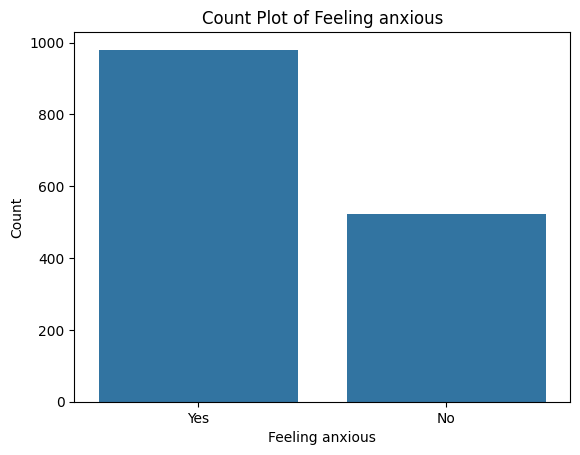

Feeling anxious
Yes    980
No     523
Name: count, dtype: int64

In [12]:
# Data distributions
#exploring target variable
sns.countplot(x='Feeling anxious', data=df)
plt.xlabel('Feeling anxious')
plt.ylabel('Count')
plt.title('Count Plot of Feeling anxious')
plt.show()

df['Feeling anxious'].value_counts()

The target variable, "Feeling anxious," was found to be unbalanced during the analysis, with most of the records reporting feeling anxious

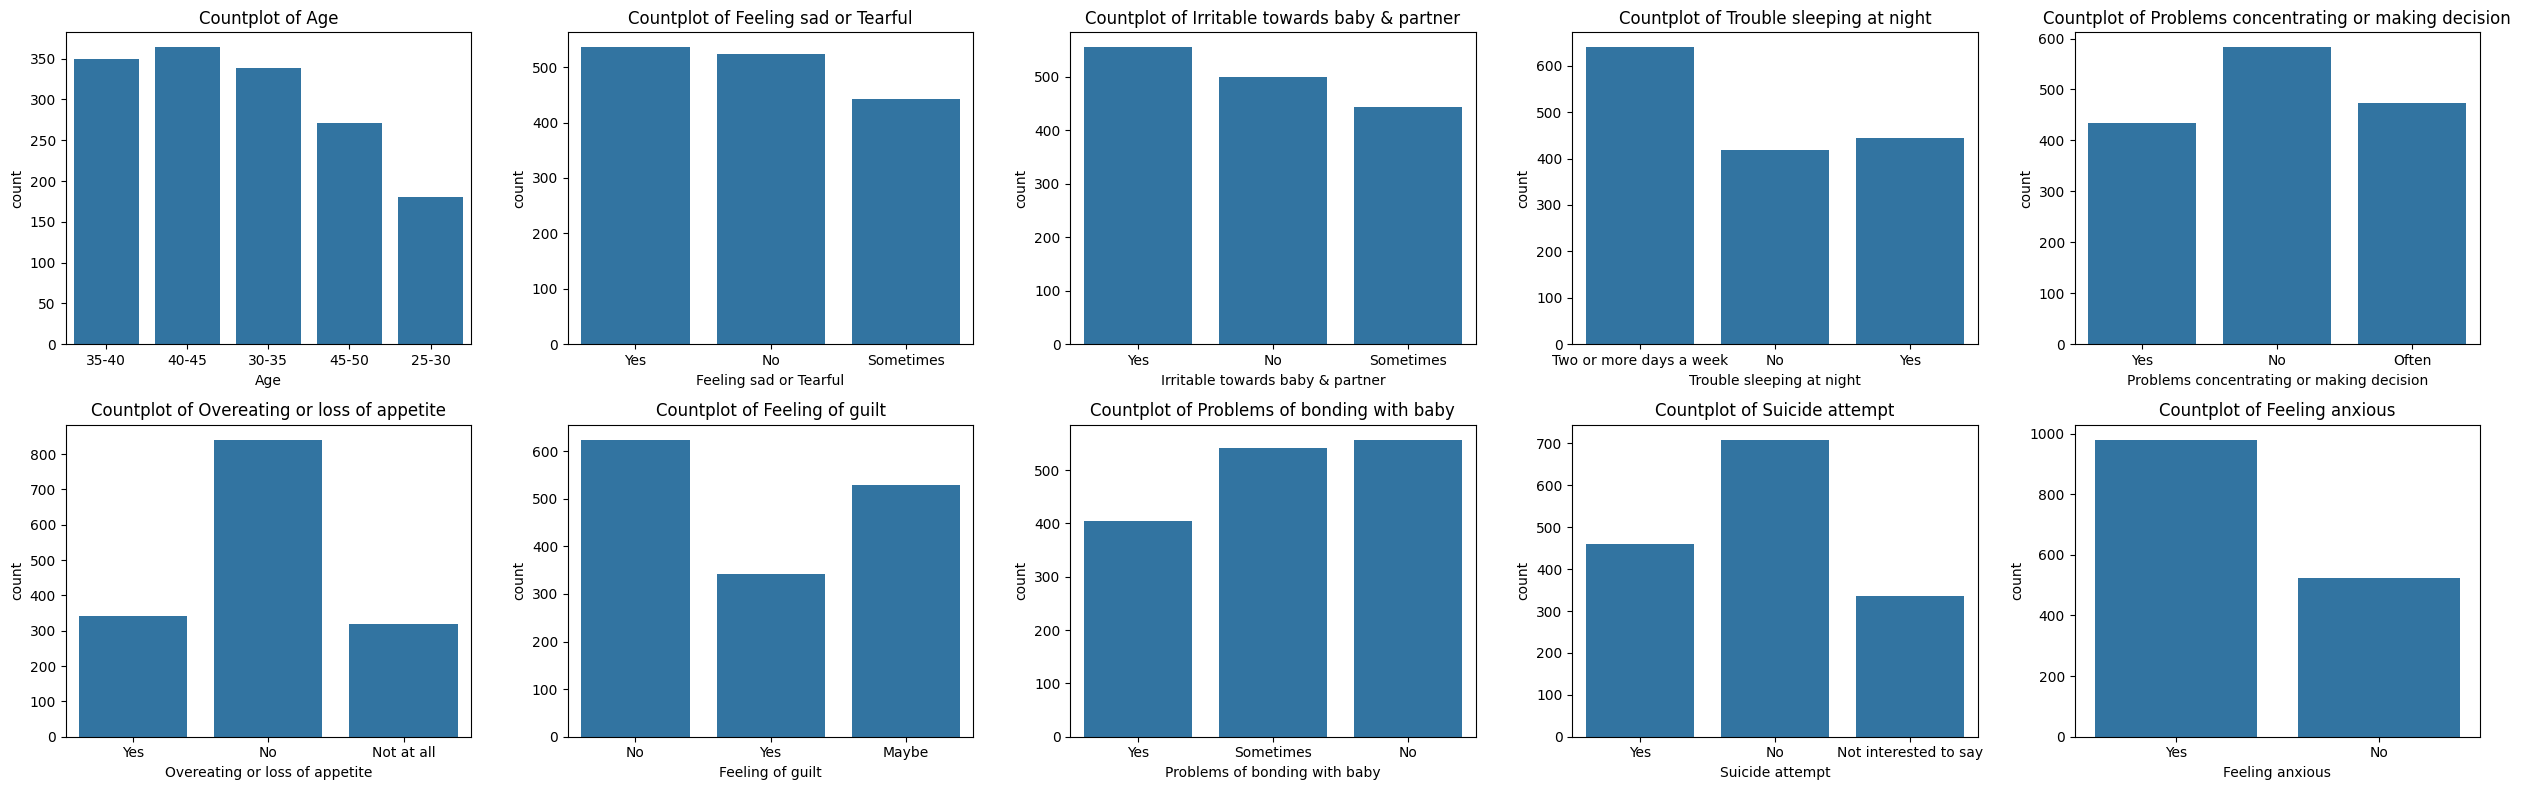

In [11]:
#data distributions of individuals features
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#Frequency distribution of values in variables
col_names = ['Age','Feeling sad or Tearful','Irritable towards baby & partner','Trouble sleeping at night','Problems concentrating or making decision','Overeating or loss of appetite','Feeling of guilt','Problems of bonding with baby','Suicide attempt','Feeling anxious']
for col in col_names:
    print(df[col].value_counts())

Age
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: count, dtype: int64
Feeling sad or Tearful
Yes          536
No           524
Sometimes    443
Name: count, dtype: int64
Irritable towards baby & partner
Yes          561
No           499
Sometimes    443
Name: count, dtype: int64
Trouble sleeping at night
Two or more days a week    640
Yes                        445
No                         418
Name: count, dtype: int64
Problems concentrating or making decision
No       595
Often    473
Yes      435
Name: count, dtype: int64
Overeating or loss of appetite
No            841
Yes           343
Not at all    319
Name: count, dtype: int64
Feeling of guilt
No       633
Maybe    528
Yes      342
Name: count, dtype: int64
Problems of bonding with baby
No           557
Sometimes    542
Yes          404
Name: count, dtype: int64
Suicide attempt
No                       709
Yes                      459
Not interested to say    335
Name: count, dtype: int64
Feeling anxiou

**Summary of univariant analysis**


1.   On observation of the Age variable, data implies most individuals are in the 40-45 age group and fewer individuals are in the 25-30 age group.
2.  From the distribution of feeling sad (or) tearful variable, this section found an equal portion of individuals reported both.
3.   By observing irritable towards baby and partner variable, this section infers that, many individuals reported irritation and that irritation is every time (or) sometimes.
4. When investigating the trouble sleeping at night variable, it is evident that a majority number of individuals reported having problems sleeping two (or) more days a week.
5.   By looking into the problems concentrating or making decisions, a significant majority of individuals have not encountered such problems.
6.   The pattern from overeating (or) loss of appetite variable infers Most individuals indicated problems that might be every time (or) sometimes.
7.   Observing the guilt feeling column, we can say that minority respondents reported as guilty.
8.   Many individuals reported they do not have problems bonding with the baby and the majority have no intention of committing suicide.






**4.2 Bivariant Analysis - checking relationships with target variable**

<Axes: xlabel='Age', ylabel='count'>

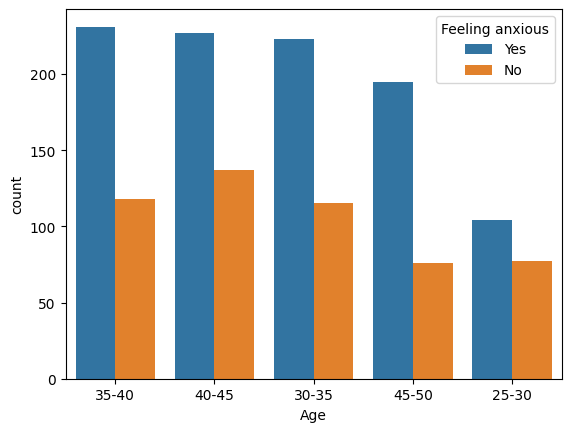

In [13]:
# Age vs  Feeling Anxious
sns.countplot(x='Age', hue='Feeling anxious', data=df)

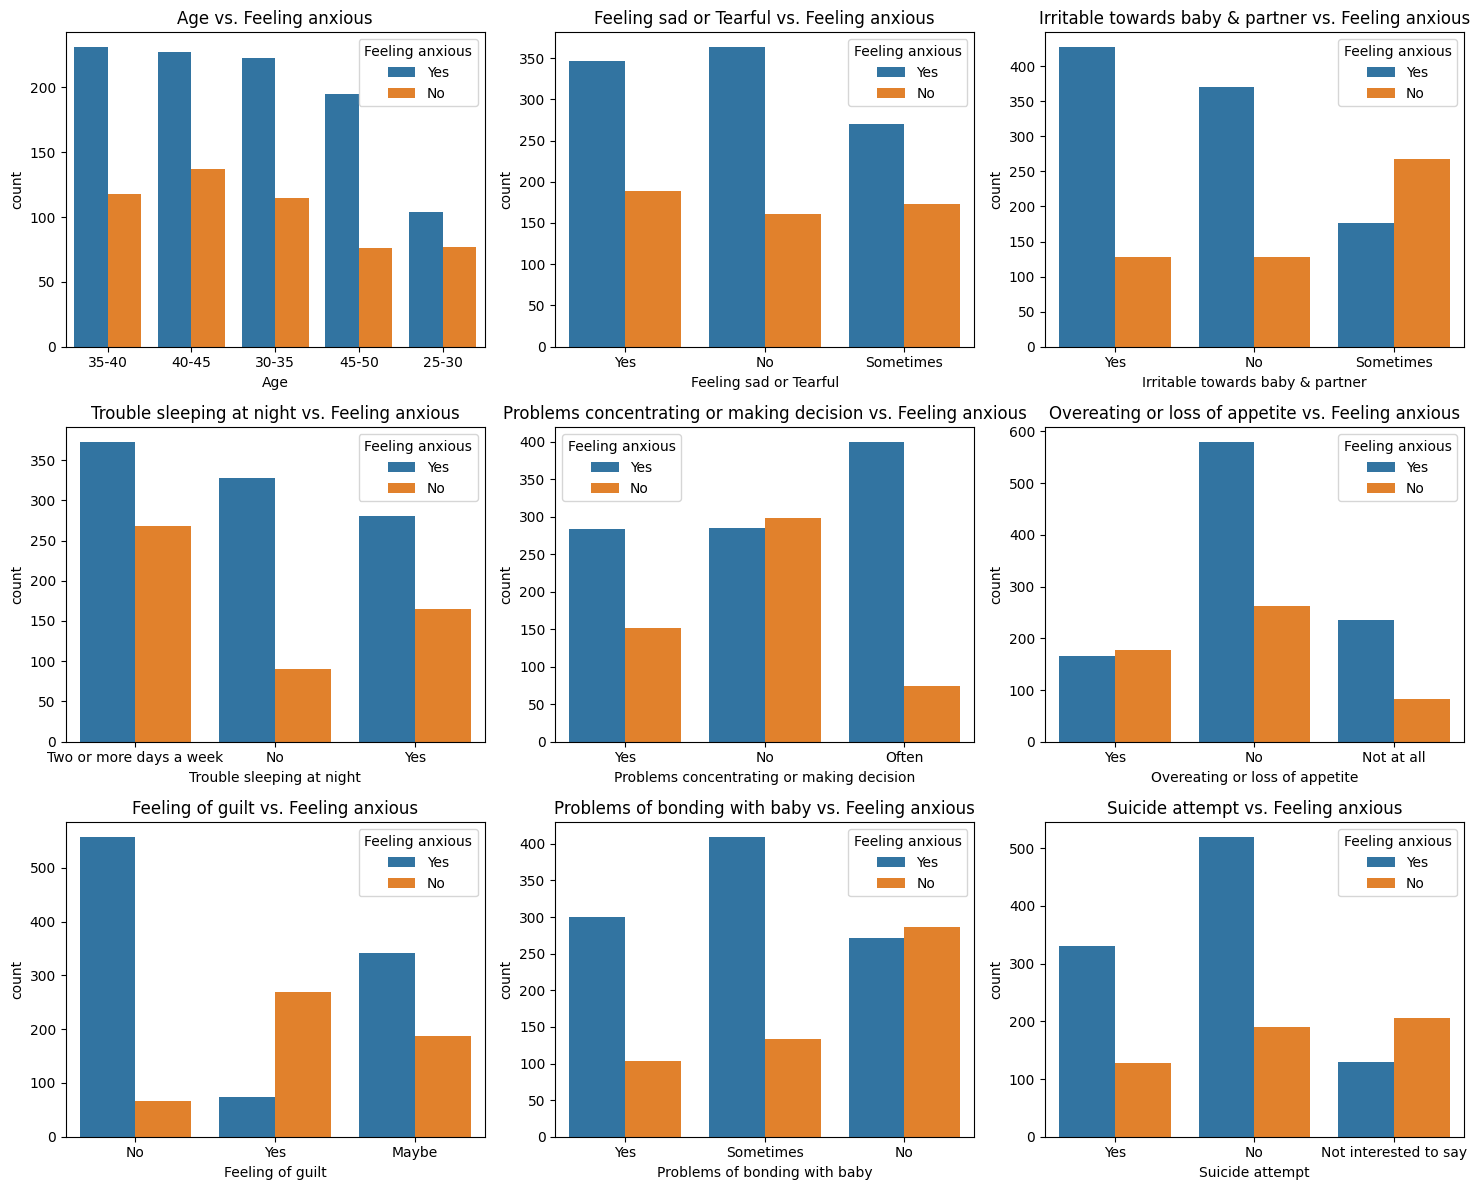

In [14]:
# performing bivariant analysis for each feature with target variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.countplot(x=col, hue='Feeling anxious', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Feeling anxious')

plt.tight_layout()
plt.show()

**Summary of Bivariant analysis**


1.   According to the analysis, individuals aged above 30 are reporting feeling anxious comparatively than those age below 30.
2.   Individuals who reported irritability towards baby and partner, problems bonding with baby, and individuals who are having trouble more often are feeling highly anxious.
3.   Individuals who reported feeling sad or tearful and also the individuals who reported trouble sleeping at night are not much experiencing anxious.
4.   According to the data, overeating (or) losing appetite and also who is having guilt, and attempting suicide does not result in any anxiety.



# **5.Modelling**

**5.1 Training and Testing datasets**

In [16]:
# spliting data into training and testing sets
X = df.drop(columns=['Feeling anxious']) #independent variables
y = df['Feeling anxious'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.shape)

print(X_train.shape)
print(X_test.shape)

(1503, 10)
(1202, 9)
(301, 9)


**5.2 Encoding**

In [17]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Age','Feeling sad or Tearful','Irritable towards baby & partner','Trouble sleeping at night','Problems concentrating or making decision','Overeating or loss of appetite','Feeling of guilt','Problems of bonding with baby','Suicide attempt'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

**5.3 Model training using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.66      0.66      0.66        95
         Yes       0.84      0.84      0.84       206

    accuracy                           0.79       301
   macro avg       0.75      0.75      0.75       301
weighted avg       0.79      0.79      0.79       301

[[ 63  32]
 [ 32 174]]


**5.4 Model training using Decision Trees**

In [ ]:
Decision_Tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

Decision_Tree_classifier.fit(X_train, y_train)
y_pred = Decision_Tree_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.72      0.67      0.70        95
         Yes       0.85      0.88      0.87       206

    accuracy                           0.81       301
   macro avg       0.79      0.78      0.78       301
weighted avg       0.81      0.81      0.81       301

[[ 64  31]
 [ 25 181]]


**5.5 Model training using Random Forest**

In [20]:
RandomForest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
RandomForest_classifier.fit(X_train, y_train)
y_pred = RandomForest_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97        95
         Yes       1.00      0.97      0.99       206

    accuracy                           0.98       301
   macro avg       0.97      0.99      0.98       301
weighted avg       0.98      0.98      0.98       301



In [21]:
# feature scores
feature_scores = pd.Series(RandomForest_classifier.feature_importances_,
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

Feeling of guilt                             0.253080
Irritable towards baby & partner             0.140672
Problems concentrating or making decision    0.113686
Overeating or loss of appetite               0.092459
Problems of bonding with baby                0.086422
Trouble sleeping at night                    0.083158
Suicide attempt                              0.082775
Age                                          0.075592
Feeling sad or Tearful                       0.072158
dtype: float64

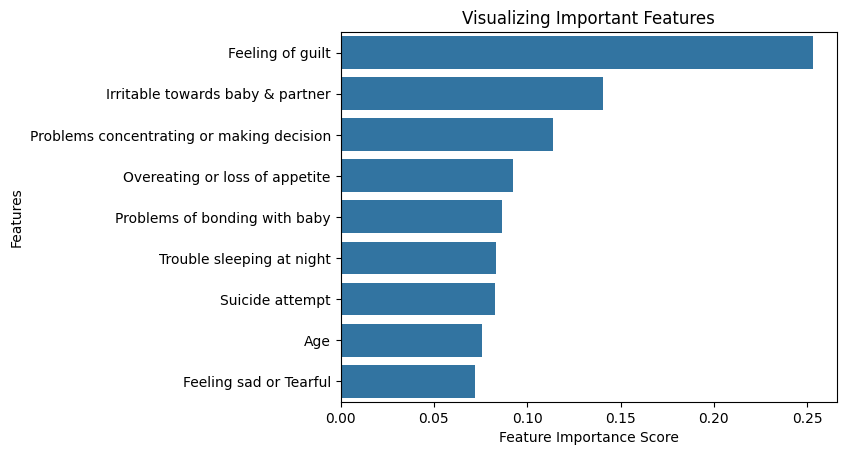

In [22]:
# Visualizing Important Features
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

According to the scores, top 3 features contributing to models’ prediction are ‘Feeling of guilt’, ’irritable towards baby and partner’ and, ’problems concentrating or making decision’.

**5.6 Model training using SVM**

In [ ]:
SV_classifier = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SV_classifier.fit(X_train, y_train)
y_pred = SV_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.76      0.80      0.78        95
         Yes       0.91      0.88      0.89       206

    accuracy                           0.86       301
   macro avg       0.83      0.84      0.84       301
weighted avg       0.86      0.86      0.86       301



**5.7 Model training using KNN**

In [ ]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(X_train, y_train)
y_pred = KNN_Classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 81  14]
 [ 18 188]]
              precision    recall  f1-score   support

          No       0.82      0.85      0.84        95
         Yes       0.93      0.91      0.92       206

    accuracy                           0.89       301
   macro avg       0.87      0.88      0.88       301
weighted avg       0.90      0.89      0.89       301



**5.8 Model training using XGBOOST**

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_Classifier = xgb.XGBClassifier()
xgb_Classifier = xgb_Classifier.fit(X_train, y_train_encoded)

y_pred = xgb_Classifier.predict(X_test)

print(confusion_matrix(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

[[ 95   0]
 [  6 200]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        95
           1       1.00      0.97      0.99       206

    accuracy                           0.98       301
   macro avg       0.97      0.99      0.98       301
weighted avg       0.98      0.98      0.98       301



**5.9 Model training using Neural networks**

In [ ]:
#label_encoder = LabelEncoder()
#y_train = label_encoder.fit_transform(y_train)
#y_test = label_encoder.transform(y_test)

#Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
31/31 [==============================] - 3s 39ms/step - loss: 0.5951 - accuracy: 0.6878 - val_loss: 0.5494 - val_accuracy: 0.7635
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4865 - accuracy: 0.8044 - val_loss: 0.4898 - val_accuracy: 0.8008
Epoch 3/100
31/31 [==============================] - 0s 14ms/step - loss: 0.4382 - accuracy: 0.8075 - val_loss: 0.4672 - val_accuracy: 0.8050
Epoch 4/100
31/31 [==============================] - 1s 21ms/step - loss: 0.4179 - accuracy: 0.8189 - val_loss: 0.4462 - val_accuracy: 0.8008
Epoch 5/100
31/31 [==============================] - 1s 19ms/step - loss: 0.4123 - accuracy: 0.8148 - val_loss: 0.4290 - val_accuracy: 0.8257
Epoch 6/100
31/31 [==============================] - 1s 21ms/step - loss: 0.3929 - accuracy: 0.8252 - val_loss: 0.4184 - val_accuracy: 0.8257
Epoch 7/100
31/31 [==============================] - 1s 30ms/step - loss: 0.3877 - accuracy: 0.8283 - val_loss: 0.4081 - val_accuracy: 0.8299
Epoch 

In [ ]:
#  predictions
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.flatten()

print(confusion_matrix(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))


10/10 [==============================] - 0s 5ms/step
[[ 80  15]
 [ 20 186]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        95
           1       0.93      0.90      0.91       206

    accuracy                           0.88       301
   macro avg       0.86      0.87      0.87       301
weighted avg       0.89      0.88      0.88       301



**6.Results**

By evaluating the model performance, below are the inferences


1.   The Random Forest and XGBoost models performed well and achieved the highest F-score of 0.99 for feeling anxious class and 0.97 for Not feeling anxious class.
2.  These states Random Forest and XGBoost models are able to understand the patterns inside data and can effectively predict the likelihood of feeling anxious.
3.   The precision of 0.99 infers that the random forest correctly identified 99% of the positive predicted feeling anxious instances out of all positively classified instances, Similarly with the recall of 0.98, the random forest identified 92 percentage of all actual instances of feeling anxious in the data.




